In [679]:
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [681]:
df = pd.read_csv('taxi_trip_pricing.csv')

In [683]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [685]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [687]:
df.value_counts('Day_of_Week')

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

In [689]:
l = []
for i in range(len(df)):
    if df['Trip_Distance_km'][i] != None:
        l.append(df['Trip_Distance_km'][i])
l1 = [k for k in l if not np.isnan(k)]
avg = sum(l1) / len(l1)
avg

27.070546861761304

In [691]:
df['Trip_Distance_km'].fillna(avg, inplace=True)

In [693]:
l02 = []
for i in range(len(df)):
    if df['Base_Fare'][i] != None:
        l02.append(df['Base_Fare'][i])
l3 = [k for k in l02 if not np.isnan(k)]
avg2 = sum(l3) / len(l3)
avg2

3.502989473684212

In [695]:
df['Base_Fare'].fillna(avg2, inplace=True)

In [697]:
df[['Traffic_Conditions','Trip_Duration_Minutes','Weather']]

,Traffic_Conditions,Trip_Duration_Minutes,Weather
0,Low,53.82,Clear
1,High,40.57,Clear
2,High,37.27,Clear
3,Low,116.81,NaN
4,High,22.64,Clear
...,...,...,...
995,Medium,58.39,Clear
996,Medium,61.96,Clear
997,Low,54.18,Rain
998,Low,114.94,Clear


In [699]:
df.value_counts('Time_of_Day')

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [701]:
df['Time_of_Day'].fillna(method='ffill', inplace=True)

In [703]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.2624
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,NaN
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.9032
3,30.330000,Evening,Weekday,4.0,Low,NaN,3.480000,0.51,0.15,116.81,36.4698
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.490000,Afternoon,Weekend,4.0,Medium,Clear,2.390000,0.62,0.49,58.39,34.4049
996,45.950000,Night,Weekday,4.0,Medium,Clear,3.120000,0.61,NaN,61.96,62.1295
997,7.700000,Morning,Weekday,3.0,Low,Rain,2.080000,1.78,NaN,54.18,33.1236
998,47.560000,Morning,Weekday,1.0,Low,Clear,2.670000,0.82,0.17,114.94,61.2090


In [705]:
df['Traffic_Conditions'].value_counts()

Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64

In [707]:
df['Day_of_Week'].value_counts()

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

In [709]:
df['Traffic_Conditions'].fillna('Other',inplace=True)

In [711]:
df['Passenger_Count'].fillna('Other',inplace=True)

In [713]:
def fill_na_probabilistic(df, condition_col, target_col):
    for condition in df[condition_col].unique():
        subset = df[df[condition_col] == condition][target_col]
        probs = subset.value_counts(normalize=True) 
        df.loc[(df[target_col].isna()) & (df[condition_col] == condition), target_col] = np.random.choice(probs.index, size=(df[target_col].isna() & (df[condition_col] == condition)).sum(), p=probs.values)
    return df

df = fill_na_probabilistic(df, 'Traffic_Conditions', 'Day_of_Week')
print(df)

     Trip_Distance_km Time_of_Day Day_of_Week Passenger_Count  \
0           19.350000     Morning     Weekday             3.0   
1           47.590000   Afternoon     Weekday             1.0   
2           36.870000     Evening     Weekend             1.0   
3           30.330000     Evening     Weekday             4.0   
4           27.070547     Evening     Weekday             3.0   
..                ...         ...         ...             ...   
995          5.490000   Afternoon     Weekend             4.0   
996         45.950000       Night     Weekday             4.0   
997          7.700000     Morning     Weekday             3.0   
998         47.560000     Morning     Weekday             1.0   
999         22.850000     Morning     Weekend             3.0   

    Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                  Low   Clear   3.560000         0.80             0.32   
1                 High   Clear   3.502989         0.62             0.

In [715]:
df['Weather'].value_counts()

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

In [717]:
df['Weather'].fillna('Other',inplace=True)

In [719]:
df[['Trip_Distance_km','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]

,Trip_Distance_km,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,0.80,0.32,53.82,36.2624
1,47.590000,0.62,0.43,40.57,NaN
2,36.870000,1.21,0.15,37.27,52.9032
3,30.330000,0.51,0.15,116.81,36.4698
4,27.070547,0.63,0.32,22.64,15.6180
...,...,...,...,...,...
995,5.490000,0.62,0.49,58.39,34.4049
996,45.950000,0.61,NaN,61.96,62.1295
997,7.700000,1.78,NaN,54.18,33.1236
998,47.560000,0.82,0.17,114.94,61.2090


In [757]:
df.loc[ df['Trip_Distance_km'].notnull() & df['Per_Km_Rate'].notnull() & 
    df['Per_Minute_Rate'].notnull() & df['Trip_Duration_Minutes'].notnull() & df['Trip_Price'].isnull(),
    'Trip_Price' ] = df['Per_Km_Rate']*df['Trip_Distance_km'] + df['Per_Minute_Rate']*df['Trip_Duration_Minutes']+df['Base_Fare']

In [759]:
df.loc[ 
    df['Trip_Distance_km'].notnull() & 
    df['Per_Km_Rate'].notnull() & 
    df['Per_Minute_Rate'].notnull() & 
    df['Trip_Price'].notnull() & 
    df['Trip_Duration_Minutes'].isnull(),
    'Trip_Duration_Minutes' ] = (df['Trip_Price'] - df['Trip_Distance_km']*df['Per_Km_Rate'] - df['Base_Fare']) / df['Per_Minute_Rate']

In [761]:
df.loc[ 
    df['Trip_Distance_km'].notnull() & 
    df['Per_Km_Rate'].notnull() & 
    df['Trip_Duration_Minutes'].notnull() & 
    df['Trip_Price'].notnull() &
    df['Per_Minute_Rate'].isnull(),
    'Per_Minute_Rate' ] = (df['Trip_Price'] - df['Trip_Distance_km']*df['Per_Km_Rate'] - df['Base_Fare']) / df['Trip_Duration_Minutes']

In [763]:
df.loc[ 
    df['Trip_Distance_km'].notnull() & 
    df['Per_Minute_Rate'].notnull() & 
    df['Trip_Duration_Minutes'].notnull() & 
    df['Trip_Price'].notnull() &
    df['Per_Km_Rate'].isnull(),
    'Per_Km_Rate' ] = (df['Trip_Price'] - df['Trip_Duration_Minutes']*df['Per_Minute_Rate'] - df['Base_Fare']) / df['Trip_Distance_km']

In [765]:
df[df['Trip_Price'].isnull()==True]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price


In [767]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [769]:
df.dtypes

Trip_Distance_km         float64
Time_of_Day                int64
Day_of_Week                int64
Passenger_Count            int64
Traffic_Conditions         int64
Weather                    int64
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [737]:
l = []
for i in range(len(df)):
    if df['Per_Km_Rate'][i] != None:
        l.append(df['Per_Km_Rate'][i])
l1 = [k for k in l if not np.isnan(k)]
avg = sum(l1) / len(l1)
avg

1.2318314643785266

In [739]:
df['Per_Km_Rate'].fillna(avg,inplace=True)

In [741]:
l03 = []
for i in range(len(df)):
    if df['Per_Minute_Rate'][i] != None:
        l03.append(df['Per_Minute_Rate'][i])
l4 = [k for k in l03 if not np.isnan(k)]
avg3 = sum(l4) / len(l4)
avg3

0.2948223962610312

In [743]:
df['Per_Minute_Rate'].fillna(avg3,inplace=True)

In [745]:
avg5 = df['Trip_Distance_km'].mean()
avg5

27.07054686176132

In [747]:
l04 = []
for i in range(len(df)):
    if df['Trip_Duration_Minutes'][i] != None:
        l04.append(df['Trip_Duration_Minutes'][i])
l5 = [k for k in l04 if not np.isnan(k)]
avg4 = sum(l5) / len(l5)
avg4

62.104167075569

In [749]:
ratio = avg5 / avg4 
ratio

0.4358893796743396

In [751]:
df['Trip_Duration_Minutes'].fillna(ratio,inplace=True)

In [753]:
df['Weather'].value_counts()

Weather
Clear    667
Rain     227
Snow      56
Other     50
Name: count, dtype: int64

In [755]:
df['Time_of_Day'] = df['Time_of_Day'].map({'Afternoon':0,'Morning':1,'Evening':2,'Night':3})
df['Day_of_Week'] = df['Day_of_Week'].map({'Weekday':0,'Weekend':1})
df['Passenger_Count'] = df['Passenger_Count'].map({3.0:0,2.0:1,1.0:2,4.0:3,'Other':4})
df['Traffic_Conditions'] = df['Traffic_Conditions'].map({'Low':0,'Medium':1,'High':2,'Other':3})
df['Weather'] = df['Weather'].map({'Clear':0,'Rain':1,'Snow':2,'Other':3})

In [771]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,1,0,0,0,0,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,0,0,2,2,0,3.502989,0.62,0.43,40.57,50.453889
2,36.870000,2,1,2,2,0,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,2,0,3,0,3,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,2,0,0,2,0,2.930000,0.63,0.32,22.64,15.618000
...,...,...,...,...,...,...,...,...,...,...,...
995,5.490000,0,1,3,1,0,2.390000,0.62,0.49,58.39,34.404900
996,45.950000,3,0,3,1,0,3.120000,0.61,0.50,61.96,62.129500
997,7.700000,1,0,0,0,1,2.080000,1.78,0.32,54.18,33.123600
998,47.560000,1,0,2,0,0,2.670000,0.82,0.17,114.94,61.209000


In [773]:
df.corr()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.008249,-0.025300,0.032486,0.045386,0.005404,0.031029,-0.011757,0.024030,-0.021499,0.839989
Time_of_Day,-0.008249,1.000000,0.011429,-0.030322,0.010730,-0.024447,0.025464,0.067931,0.031802,-0.011996,-0.002467
Day_of_Week,-0.025300,0.011429,1.000000,0.060536,-0.032986,-0.028145,-0.027356,-0.038980,-0.006541,-0.016556,-0.033974
Passenger_Count,0.032486,-0.030322,0.060536,1.000000,-0.088721,-0.018304,0.028833,0.058239,0.019720,-0.006837,0.037904
Traffic_Conditions,0.045386,0.010730,-0.032986,-0.088721,1.000000,-0.061473,-0.016696,0.004114,-0.050693,0.022314,0.053462
Weather,0.005404,-0.024447,-0.028145,-0.018304,-0.061473,1.000000,-0.001971,-0.000243,0.039662,0.015885,0.014724
Base_Fare,0.031029,0.025464,-0.027356,0.028833,-0.016696,-0.001971,1.000000,-0.000603,-0.016834,0.007349,0.034790
Per_Km_Rate,-0.011757,0.067931,-0.038980,0.058239,0.004114,-0.000243,-0.000603,1.000000,0.039136,0.027093,0.273949
Per_Minute_Rate,0.024030,0.031802,-0.006541,0.019720,-0.050693,0.039662,-0.016834,0.039136,1.000000,-0.033614,0.202156
Trip_Duration_Minutes,-0.021499,-0.011996,-0.016556,-0.006837,0.022314,0.015885,0.007349,0.027093,-0.033614,1.000000,0.224162


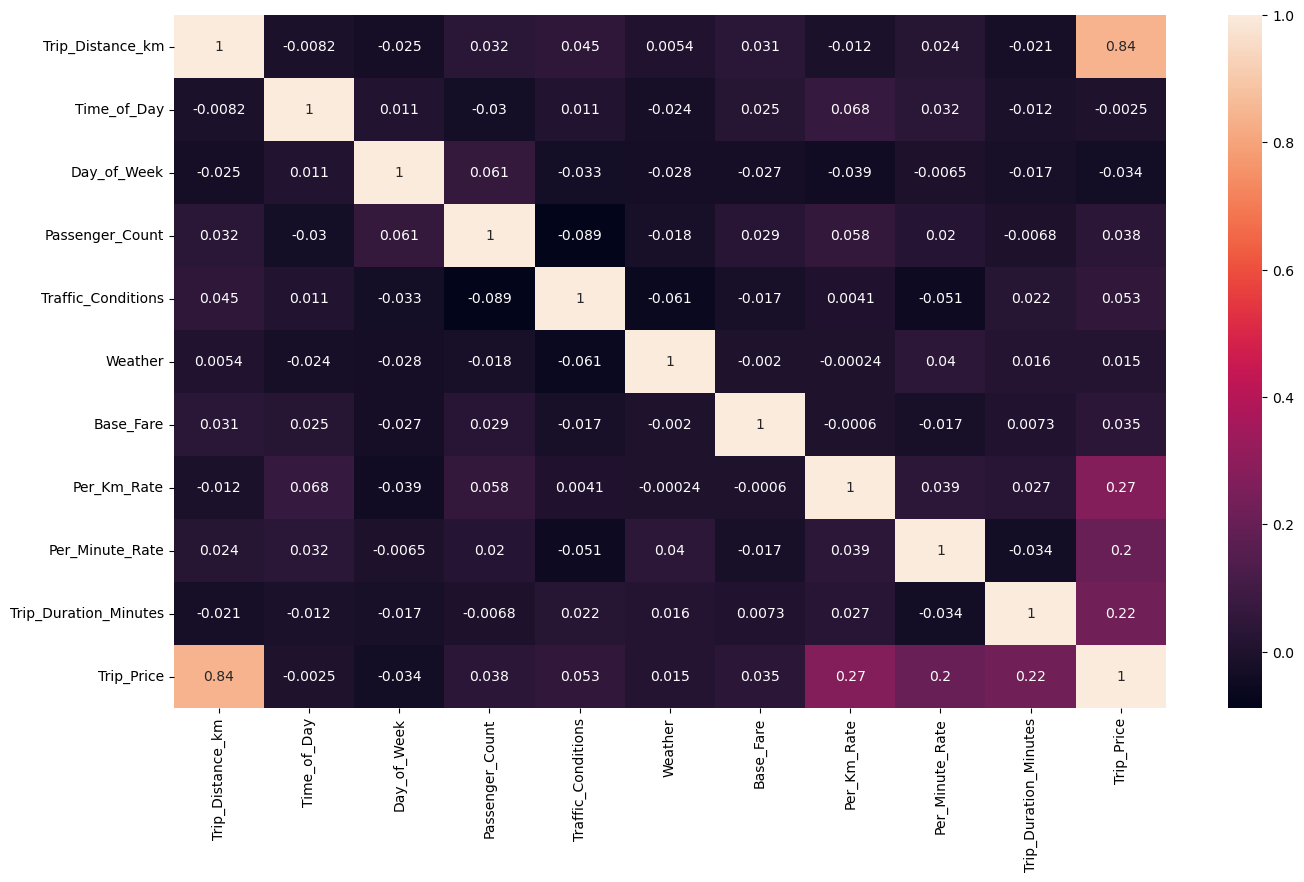

In [817]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [819]:
y=df['Trip_Price']
x=df.drop('Trip_Price',axis=1).to_numpy()

In [1361]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=49)

In [1363]:
min_max_scaler = MinMaxScaler()

In [1365]:
scaled_X_train = min_max_scaler.fit_transform(x_train)
scaled_X_test = min_max_scaler.fit_transform(x_test)

In [1367]:
linear_m = LinearRegression()
linear_m.fit(scaled_X_train,y_train)

LinearRegression()

In [1369]:
prd = linear_m.predict(scaled_X_test)
r2_score(prd, y_test)

0.8322049785855521

In [1371]:
res_df = pd.DataFrame(zip(y_test,prd),columns=['y_test','Predictions']).map(int)

In [1373]:
res_df

,y_test,Predictions
0,53,43
1,52,24
2,39,55
3,61,70
4,39,25
...,...,...
195,14,25
196,28,49
197,29,14
198,104,104


In [1375]:
mean_squared_error(prd, y_test)

276.25942183922285

In [1377]:
mean_absolute_error(prd, y_test)

13.15267435173561

In [1379]:
res_df[res_df['Predictions']<0]

,y_test,Predictions
11,23,-1
17,8,-32
21,24,-1
46,17,-2
59,14,-7
62,19,-4
68,19,-5
75,22,-1
76,18,-12
92,12,-23


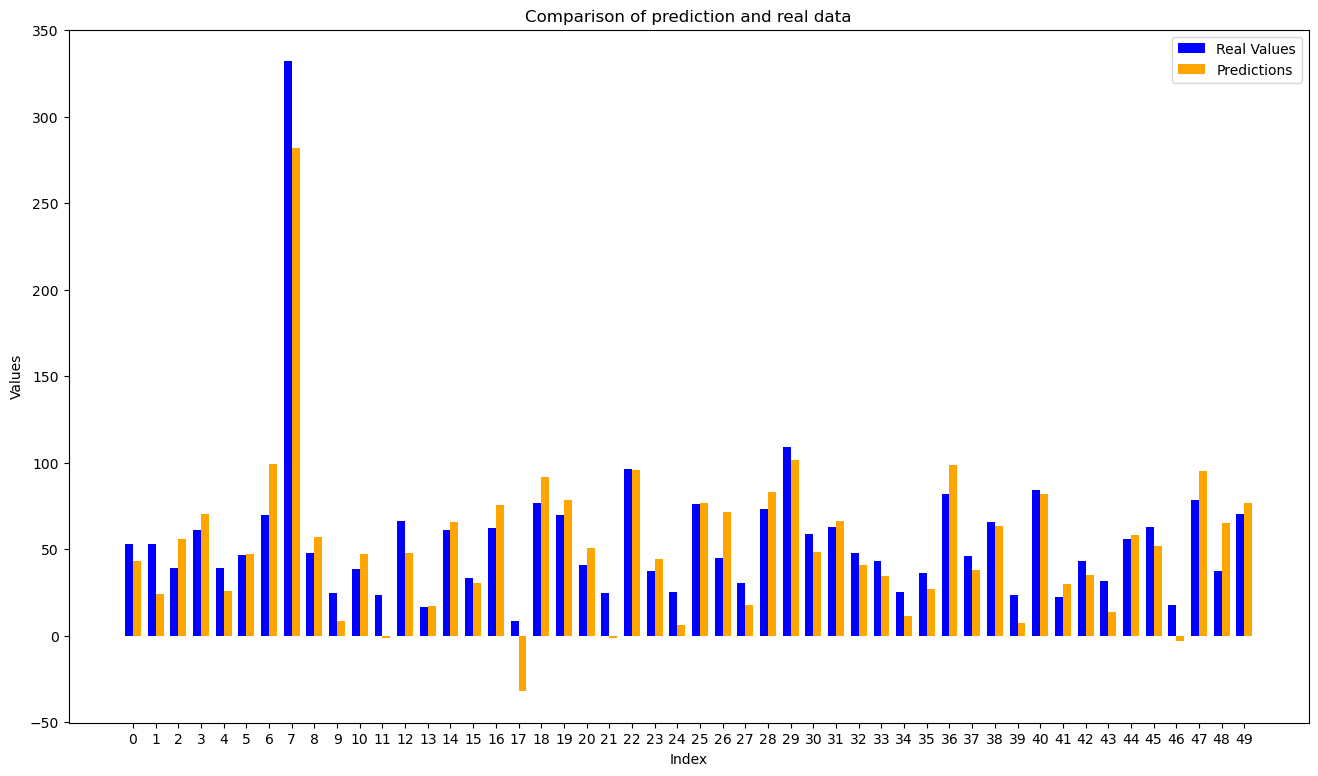

In [1381]:
indices = np.arange(len(y_test.to_numpy()[:50]))
width = 0.35
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(indices - width/2, y_test.to_numpy()[:50], width, label='Real Values', color='blue')
ax.bar(indices + width/2, prd[:50], width, label='Predictions', color='orange')
ax.set_xlabel("Index")
ax.set_ylabel("Values")
ax.set_title("Comparison of prediction and real data")
ax.set_xticks(indices)
ax.legend()
plt.show()

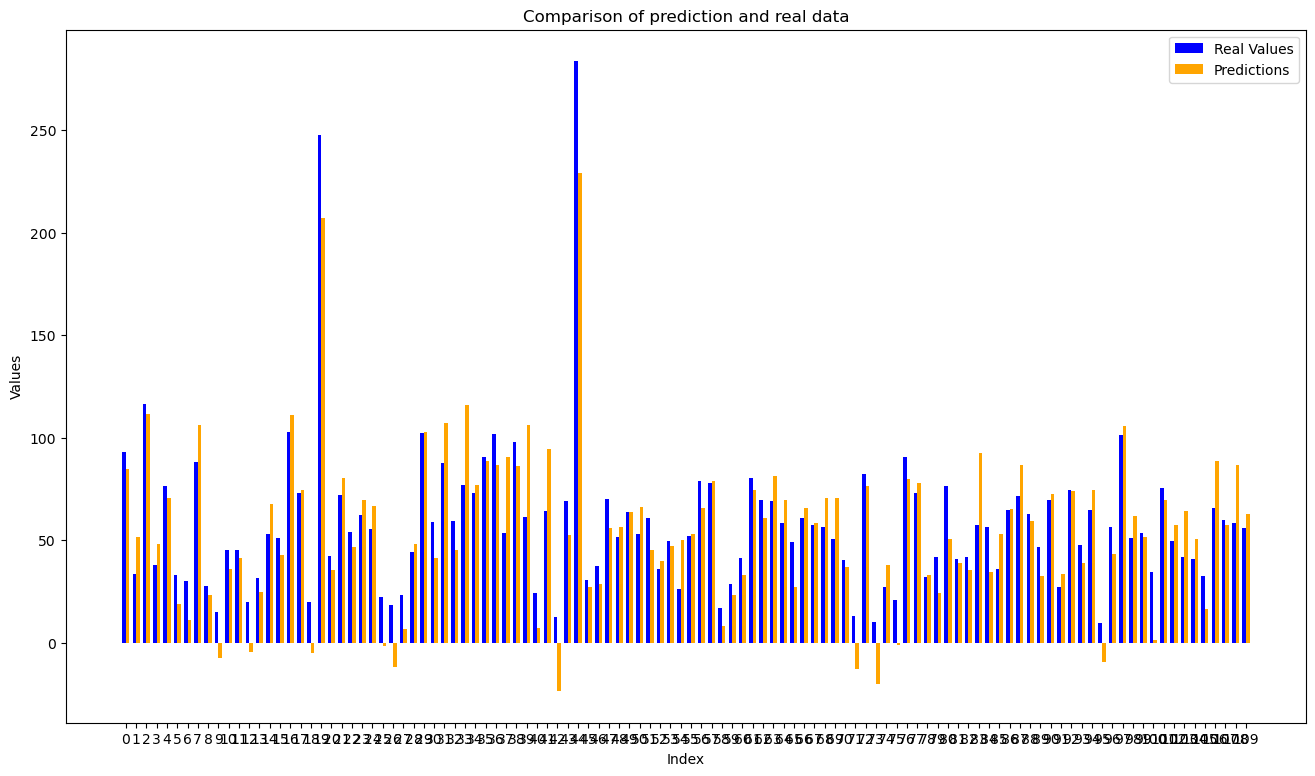

In [1383]:
indices = np.arange(len(y_test.to_numpy()[50:160]))
width = 0.35
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(indices - width/2, y_test.to_numpy()[50:160], width, label='Real Values', color='blue')
ax.bar(indices + width/2, prd[50:160], width, label='Predictions', color='orange')
ax.set_xlabel("Index")
ax.set_ylabel("Values")
ax.set_title("Comparison of prediction and real data")
ax.set_xticks(indices)
ax.legend()
plt.show()

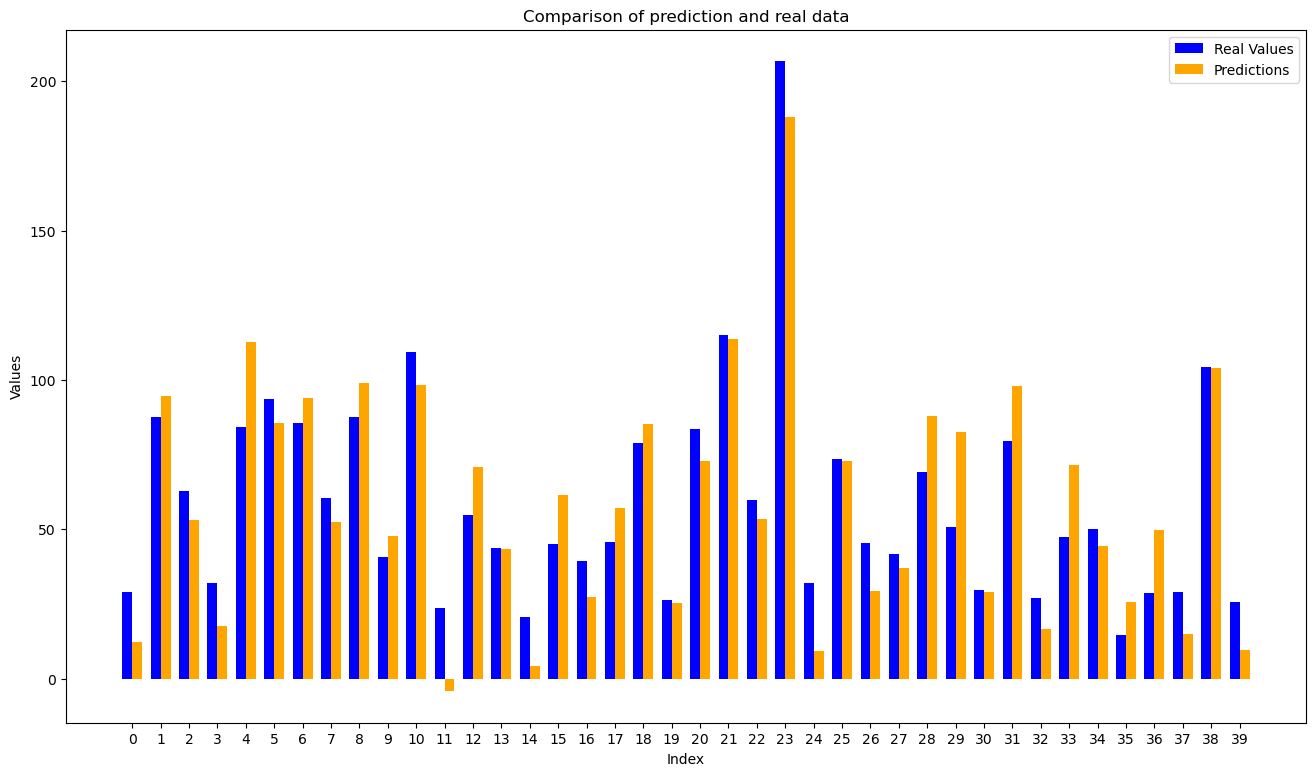

In [1385]:
indices = np.arange(len(y_test.to_numpy()[160:]))
width = 0.35
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(indices - width/2, y_test.to_numpy()[160:], width, label='Real Values', color='blue')
ax.bar(indices + width/2, prd[160:], width, label='Predictions', color='orange')
ax.set_xlabel("Index")
ax.set_ylabel("Values")
ax.set_title("Comparison of prediction and real data")
ax.set_xticks(indices)
ax.legend()
plt.show()

<Axes: ylabel='Count'>

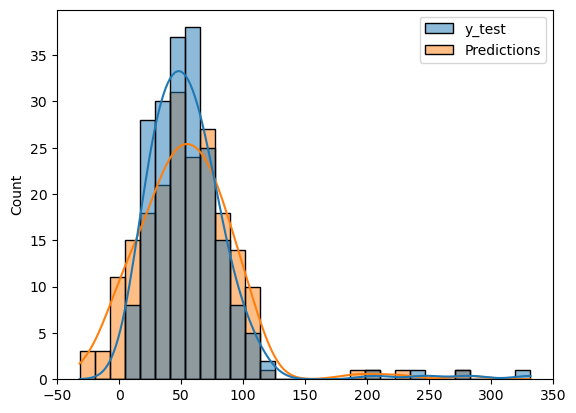

In [1387]:
sns.histplot(data=res_df,kde=True,bins=30)

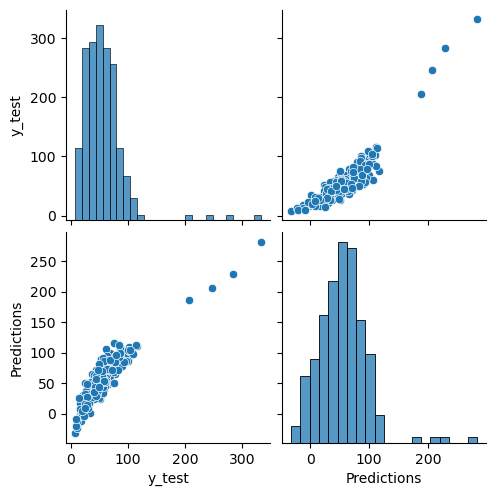

In [1389]:
sns.pairplot(data=res_df)

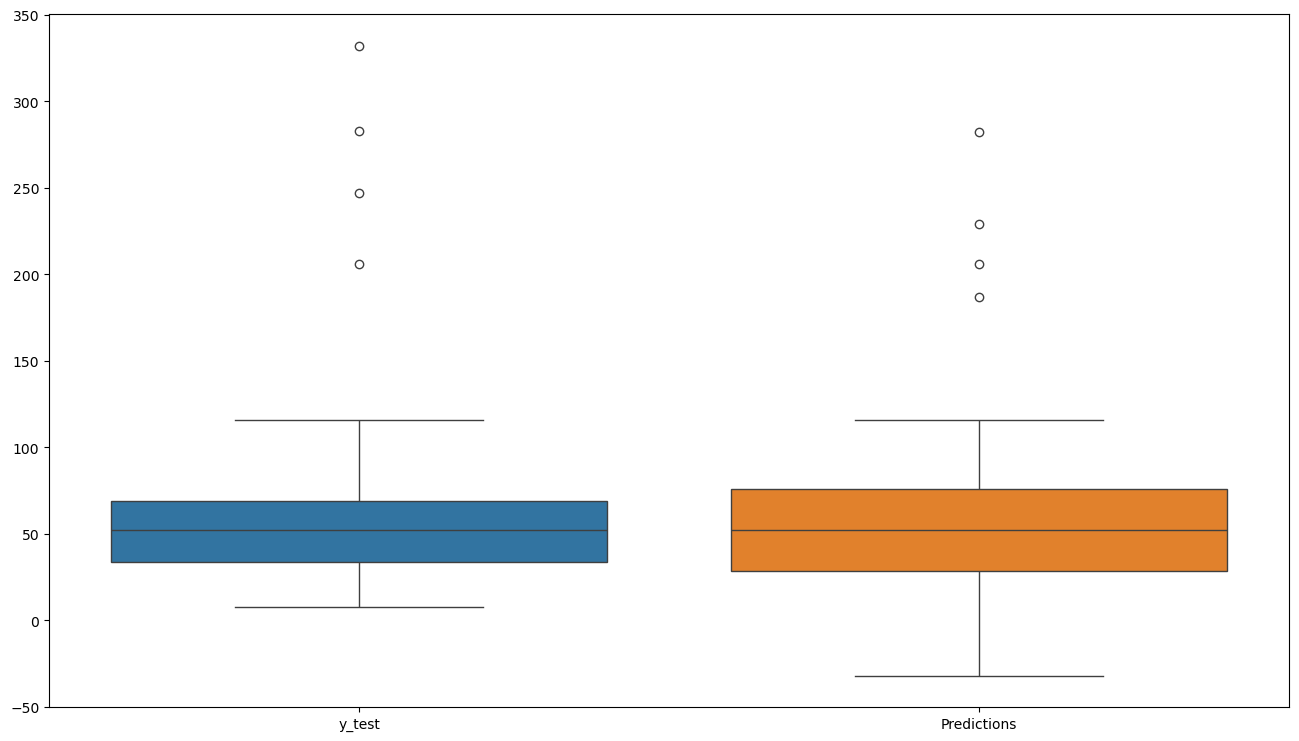

In [1391]:
plt.figure(figsize=(16,9))
sns.boxplot(data=res_df)
plt.show()

In [1393]:
Q1=np.percentile(df['Trip_Price'], 25)
Q3=np.percentile(df['Trip_Price'], 75)
IQR=Q3-Q1
low=Q1-1.5*IQR
up=Q3+1.5*IQR
outliers=df[(df['Trip_Price'] < low) | (df['Trip_Price'] > up)]
outliers

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
22,105.943550,3,1,1,0,1,3.940000,1.690000,0.320000,23.03,201.869509
27,138.098328,2,1,3,1,1,2.240000,1.750000,0.320000,94.86,280.877302
64,146.067047,0,0,1,1,0,4.790000,0.730000,0.300000,60.81,320.958664
108,112.830958,0,0,1,2,2,3.350000,1.900000,0.230000,78.63,233.008285
110,102.747556,2,0,1,1,0,2.230000,1.800000,0.230000,53.09,274.535087
141,109.616082,0,0,3,2,0,4.460000,1.690000,0.230000,53.88,327.217665
225,130.809001,0,0,2,2,0,3.930000,0.630000,0.160000,88.31,328.871769
267,116.196064,0,1,3,1,0,2.200000,0.850000,0.250000,19.63,206.699570
268,139.062230,0,0,1,0,1,2.800000,1.820000,0.140000,50.83,276.840597
287,100.380420,0,0,0,1,1,4.460000,1.231831,0.294822,89.21,329.913004


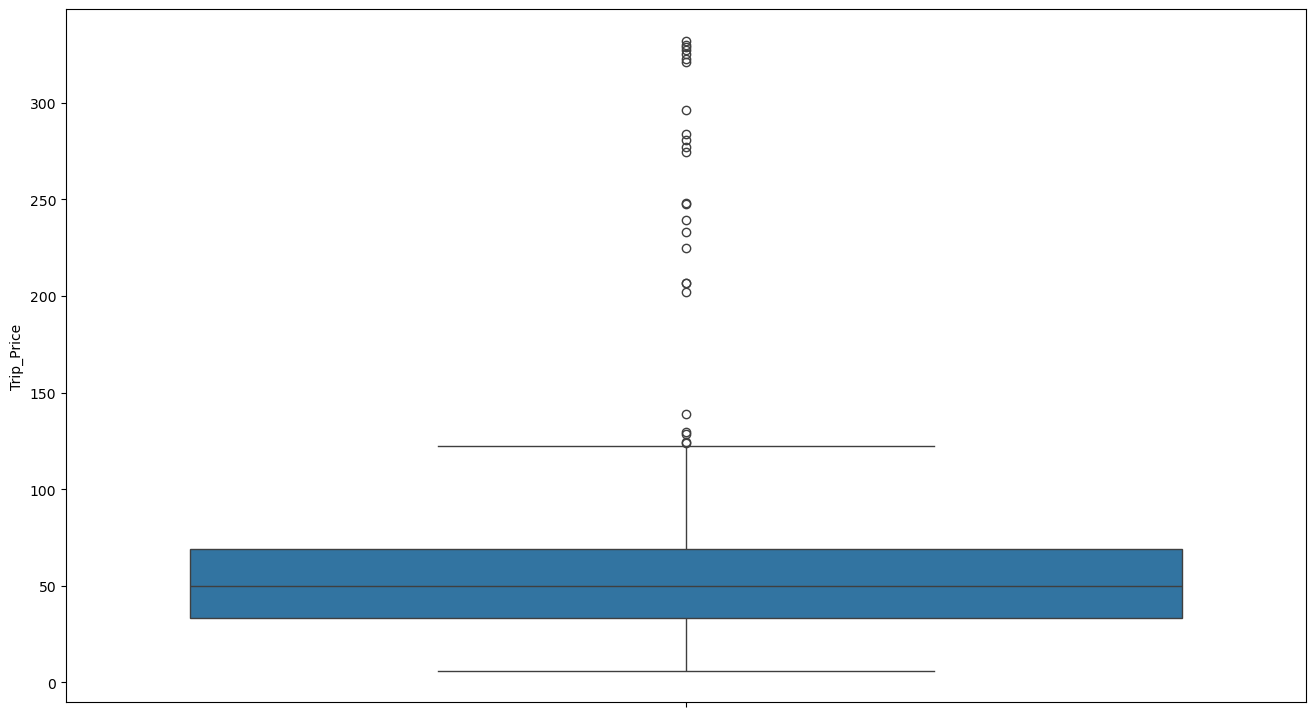

In [1395]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df['Trip_Price'])
plt.show()

In [815]:
df.loc[225]

Trip_Distance_km         130.809001
Time_of_Day                0.000000
Day_of_Week                0.000000
Passenger_Count            2.000000
Traffic_Conditions         2.000000
Weather                    0.000000
Base_Fare                  3.930000
Per_Km_Rate                0.630000
Per_Minute_Rate            0.160000
Trip_Duration_Minutes     88.310000
Trip_Price               328.871769
Name: 225, dtype: float64